In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

# Import des données

In [80]:
df = pd.read_csv('dataset_clear.csv')

In [67]:
df.head()

age     sex     bmi  children smoker     region      charges     cat_bmi
0   19  female  27.900         0    yes  southwest  16884.92400  overweight
1   18    male  33.770         1     no  southeast   1725.55230     obesity
2   28    male  33.000         3     no  southeast   4449.46200     obesity
3   33    male  22.705         0     no  northwest  21984.47061     healthy
4   32    male  28.880         0     no  northwest   3866.85520  overweight

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
 7   cat_bmi   1337 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 83.7+ KB


## Modélisation

In [81]:
df.drop_duplicates(inplace=True)

In [82]:
X = df.drop(['charges','bmi'], axis=1)
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=False,test_size=0.2, random_state=42)

# Construction du pipeline

In [83]:
numeric_features = ["age", "children"]
categorial_features = [ "sex", "region", "smoker","cat_bmi"]

In [84]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

categorical_transformer = OneHotEncoder()

In [85]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorial_features)
    ]
   , remainder="passthrough" 
)

In [86]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()

In [87]:
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline

pipe = Pipeline([
     ('preprocessor', preprocessor),
     ('decisiontree', tree)
])


# Training

In [88]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
import numpy as np
def run_experiment(model,isGridSearch = False):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    if isGridSearch:
        print('Best Hyperparameters: %s' % model.best_params_)
        print("######## R^2 : ")
        print("TRAIN :",r2_score(y_train, y_pred_train))
        print("TEST :",r2_score(y_test, y_pred_test))
        print("######## MAE : ")
        print("TRAIN :",mean_absolute_error(y_train, y_pred_train))
        print("TEST :",mean_absolute_error(y_test, y_pred_test))
        print("######## MSE : ")
        print("TRAIN :",mean_squared_error(y_train, y_pred_train))
        print("TEST :",mean_squared_error(y_test, y_pred_test))
    return model

# Justification Hyperparamètres - DecisionTreeRegressor

In [89]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# define evaluation
# cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# # define search space
# space = dict()

# # gérer les valeurs abbérantes
# space['decisiontree__criterion'] = ["squared_error", "absolute_error"] # absolute error traite mieux les valeurs abbérantes

# # Gérer la profondeur de l'arbre
# space['decisiontree__max_depth'] = np.arange(2,10,1) # plus c'est profond, plus ça over-fit (Un seul arbre, il faut un peu de profondeur pour ne pas avoir trop de biais)
# # space['decisiontree__max_leaf_nodes'] = np.arange(10,100,5) # plus c'est grand, plus ça overfit 

# # Gérer la taille des feuilles
# # space['decisiontree__min_samples_split'] = np.arange(60,400,20) # plus c'est petit, plus ça overfit
# space['decisiontree__min_samples_leaf'] = np.arange(30,150,10)  # plus c'est petit, plus ça overfit / on vise la loi des grands nombre autour de 50
# # space['decisiontree__min_weight_fraction_leaf'] = np.arange(60,400,20) # plus c'est petit, plus ça overfit 

# # Limiter les splits sans interets
# space['decisiontree__min_impurity_decrease'] = np.linspace(0,1000,100) # plus c'est petit, plus ça overfit 
# # space['decisiontree__ccp_alpha'] = np.linspace(0,1,100) # plus c'est petit, plus ça overfit 
# # define search

# random_search = RandomizedSearchCV(pipe, space, n_iter=1000, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv, random_state=1,verbose=2)



In [ ]:
def generateCv(n_splits = 10,n_repeats = 3,random_state = 1):
        """
    n_splits : int, optional
    Number of splits for the cross validation, by default 10
    n_repeats : int, optional
    Number of repeats for the cross validation, by default 3
    random_state : int, optional
    Seed for the random search, by default 1
    """
        cv = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=random_state)
        return cv

In [90]:
def random_search(isMaxDepth = True,isMaxLeafNodes = False,isMinSampleSplit = False,isMinSamplesLeaf = True,isMinWeigthFractionLeaf = False,isMinImpurtityDecrease = True,isCcpAlpha = False,
minValueDepth = 2,maxValueDepth = 10 , stepValueDepth = 1,
minValueLeafNodes = 10,maxLeafNodes = 100,stepLeafNodes = 5,
minValueSampleSplit = 60,maxValueSampleSplit = 400,stepSampleSplit = 20,
minValueSampleLeaf = 30,maxValueSampleLeaf = 150,stepSampleLeaf = 10,
minValueFractionLeaf = 60,maxValueFractionLeaf = 400 ,stepFractionLeaf = 20,
minValueImpurity = 0,maxValueImpurity = 1000,stepValueImpurity = 100,
minValueCcpAlpha = 0,maxValueCcpAlpha = 1,stepCcpAlpha = 100,
n_iter = 1000,verbose = 2):
    """
This function runs a random search on a Decision Tree model with a given set of parameters. 
The model is fitted on a pipe with a given number of iterations, cv, n_splits and n_repeats.
The parameters for the Decision Tree model are given in the same way as the sklearn Decision Tree model.

Parameters
----------
isMaxDepth : bool, optional
    Boolean to set if max_depth is to be included in the parameter search or not, by default True
isMaxLeafNodes : bool, optional
    Boolean to set if max_leaf_nodes is to be included in the parameter search or not, by default False
isMinSampleSplit : bool, optional
    Boolean to set if min_samples_split is to be included in the parameter search or not, by default False
isMinSamplesLeaf : bool, optional
    Boolean to set if min_samples_leaf is to be included in the parameter search or not, by default True
isMinWeigthFractionLeaf : bool, optional
    Boolean to set if min_weight_fraction_leaf is to be included in the parameter search or not, by default False
isMinImpurtityDecrease : bool, optional
    Boolean to set if min_impurity_decrease is to be included in the parameter search or not, by default True
isCcpAlpha : bool, optional
    Boolean to set if ccp_alpha is to be included in the parameter search or not, by default False
minValueDepth : int, optional
    Minimum value for max_depth, by default 2
maxValueDepth : int, optional
    Maximum value for max_depth, by default 10
stepValueDepth : int, optional
    Step size for max_depth, by default 1
minValueLeafNodes : int, optional
    Minimum value for max_leaf_nodes, by default 10
maxLeafNodes : int, optional
    Maximum value for max_leaf_nodes, by default 100
stepLeafNodes : int, optional
    Step size for max_leaf_nodes, by default 5
minValueSampleSplit : int, optional
    Minimum value for min_samples_split, by default 60
maxValueSampleSplit : int, optional
    Maximum value for min_samples_split, by default 400
stepSampleSplit : int, optional
    Step size for min_samples_split, by default 20
minValueSampleLeaf : int, optional
    Minimum value for min_samples_leaf, by default 30
maxValueSampleLeaf : int, optional
    Maximum value for min_samples_leaf, by default 150
stepSampleLeaf : int, optional
    Step size for min_samples_leaf, by default 10
minValueFractionLeaf : int, optional
    Minimum value for min_weight_fraction_leaf, by default 60
maxValueFractionLeaf : int, optional
    Maximum value for min_weight_fraction_leaf, by default 400
stepFractionLeaf : int, optional
    Step size for min_weight_fraction_leaf, by default 20
minValueImpurity : int, optional
    Minimum value for min_impurity_decrease, by default 0
maxValueImpurity : int, optional
    Maximum value for min_impurity_decrease, by default 1000
stepValueImpurity : int, optional
    Step size for min_impurity_decrease, by default 100
minValueCcpAlpha : int, optional
    Minimum value for ccp_alpha, by default 0
maxValueCcpAlpha : int, optional
    Maximum value for ccp_alpha, by default 1
stepCcpAlpha : int, optional
    Step size for ccp_alpha, by default 100
n_iter : int, optional
    Number of iterations for the random search, by default 1000
verbose : int, optional
    Verbosity of the random search, by default 2


Returns
-------
RandomizedSearchCV
    The RandomizedSearchCV object 
"""
    cv = generateCv()
    space = dict()
    space['decisiontree__criterion'] = ["squared_error", "absolute_error"]
    if isMaxDepth:
        space['decisiontree__max_depth'] = np.arange(minValueDepth,maxValueDepth,stepValueDepth)
    if isMaxLeafNodes:
        space['decisiontree__max_leaf_nodes'] = np.arange(minValueLeafNodes,maxLeafNodes,stepLeafNodes)
    if isMinSampleSplit:
        space['decisiontree__min_samples_split'] = np.arange(minValueSampleSplit,maxValueSampleSplit,stepSampleSplit)
    if isMinSamplesLeaf:
        space['decisiontree__min_samples_leaf'] = np.arange(minValueSampleLeaf,maxValueSampleLeaf,stepSampleLeaf)
    if isMinWeigthFractionLeaf:
        space['decisiontree__min_weight_fraction_leaf'] = np.arange(minValueFractionLeaf,maxValueFractionLeaf,stepFractionLeaf)
    if isMinImpurtityDecrease:
        space['decisiontree__min_impurity_decrease'] = np.linspace(minValueImpurity,maxValueImpurity,stepValueImpurity)
    if isCcpAlpha:
        space['decisiontree__ccp_alpha'] = np.linspace(minValueCcpAlpha,maxValueCcpAlpha,stepCcpAlpha)
    random_search = RandomizedSearchCV(pipe, space, n_iter=n_iter, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv,verbose=verbose)
    return random_search

    
    

In [91]:
def best_params():
    model = run_experiment(random_search())
    return model.best_params_

Fitting 30 folds for each of 1000 candidates, totalling 30000 fits
[CV] END decisiontree__criterion=absolute_error, decisiontree__max_depth=2, decisiontree__min_impurity_decrease=656.5656565656565, decisiontree__min_samples_leaf=100; total time=   0.0s
[CV] END decisiontree__criterion=absolute_error, decisiontree__max_depth=2, decisiontree__min_impurity_decrease=656.5656565656565, decisiontree__min_samples_leaf=100; total time=   0.0s
[CV] END decisiontree__criterion=absolute_error, decisiontree__max_depth=2, decisiontree__min_impurity_decrease=656.5656565656565, decisiontree__min_samples_leaf=100; total time=   0.0s
[CV] END decisiontree__criterion=absolute_error, decisiontree__max_depth=2, decisiontree__min_impurity_decrease=656.5656565656565, decisiontree__min_samples_leaf=100; total time=   0.0s
[CV] END decisiontree__criterion=absolute_error, decisiontree__max_depth=2, decisiontree__min_impurity_decrease=656.5656565656565, decisiontree__min_samples_leaf=100; total time=   0.1s
[CV

In [57]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
import numpy as np

# # define evaluation
# cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# # define search space
# space = dict()

# # gérer les valeurs abbérantes
# space['decisiontree__criterion'] = ["squared_error", "absolute_error"] # absolute error traite mieux les valeurs abbérantes

# # Gérer la profondeur de l'arbre
# space['decisiontree__max_depth'] = np.arange(6,9,1) # plus c'est profond, plus ça over-fit

# # Gérer la taille des feuilles
# space['decisiontree__min_samples_split'] = np.arange(30,50,5) # plus c'est petit, plus ça overfit

# # Limiter les splits sans interets
# space['decisiontree__min_impurity_decrease'] = np.linspace(0,30,2) # plus c'est petit, plus ça overfit 

# # define search
# grid_search = GridSearchCV(pipe, space, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)

In [ ]:
def grid_search():
    model = best_params()
    cv = generateCv()
    space = dict()
    for x in model.best_params_:
        if x.keys == 'decisiontree__max_depth':
            space['decisiontree__max_depth'] = np.arange(max(1,x.values-5),x.values+5,1)
        if x.keys == 'decisiontree__max_leaf_nodes':
            space['decisiontree__max_leaf_nodes'] = np.arange(max(1,x.values-5),x.values+5,1)
        if x.keys == 'decisiontree__min_samples_split':
            space['decisiontree__min_samples_split'] = np.arange(max(1,x.values-5),x.values+5,1)
        if x.keys == 'decisiontree__min_samples_leaf':
            space['decisiontree__min_samples_leaf'] = np.arange(max(1,x.values-5),x.values+5,1)
        if x.keys == 'decisiontree__min_weight_fraction_leaf':
            space['decisiontree__min_weight_fraction_leaf'] = np.arange(max(1,x.values-5),x.values+5,1)
        if x.keys == 'decisiontree__min_impurity_decrease':
            space['decisiontree__min_impurity_decrease'] = np.linspace(max(1,x.values-5),x.values+5,2)
        if x.keys == 'decisiontree__ccp_alpha':
            space['decisiontree__ccp_alpha'] = np.linspace(max(1,x.values-5),x.values+5,2)
        if x.keys == 'decisiontree__criterion':
            space['decisiontree__criterion'] = x.values
        
    grid_search = GridSearchCV(pipe, space, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv) 
    return grid_search


In [58]:
grid_search_fit = run_experiment(grid_search(),True)

Best Hyperparameters: {'decisiontree__criterion': 'absolute_error', 'decisiontree__max_depth': 8, 'decisiontree__min_impurity_decrease': 0.0, 'decisiontree__min_samples_split': 30}
######## R^2 : 
TRAIN : 0.8600643158978863
TEST : 0.8556989725586286
######## MAE : 
TRAIN : 1680.8787949382602
TEST : 2068.9115841791045
######## MSE : 
TRAIN : 20246887.761508793
TEST : 22211960.855968446


# Affichage de l'arbre

In [59]:
my_model = grid_search_fit.best_estimator_.named_steps["decisiontree"]

In [60]:
import graphviz 
from sklearn import tree
dot_data =tree.export_graphviz(my_model, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("best_decision_tree") 

'best_decision_tree.pdf'

# Feature Importance

In [61]:
my_model.feature_importances_

array([0.        , 0.00309662, 0.        , 0.00065782, 0.00050294,
       0.        , 0.40639383, 0.        , 0.        , 0.05292107,
       0.13704412, 0.00169358, 0.00183366, 0.36714344, 0.02871292])

## Shap (non fini)

In [62]:
import shap
# preprocessor.fit(X_train)
# newColowns =  preprocessor.get_feature_names_out()
# #set the tree explainer as the model of the pipeline
# explainer = shap.TreeExplainer(grid_search_fit.best_estimator_['decisiontree'])

# #apply the preprocessing to x_test
# observations = grid_search_fit.best_estimator_['preprocessor'].transform(X_test)

In [63]:
#get Shap values from preprocessed data
# shap_values = explainer.shap_values(observations)

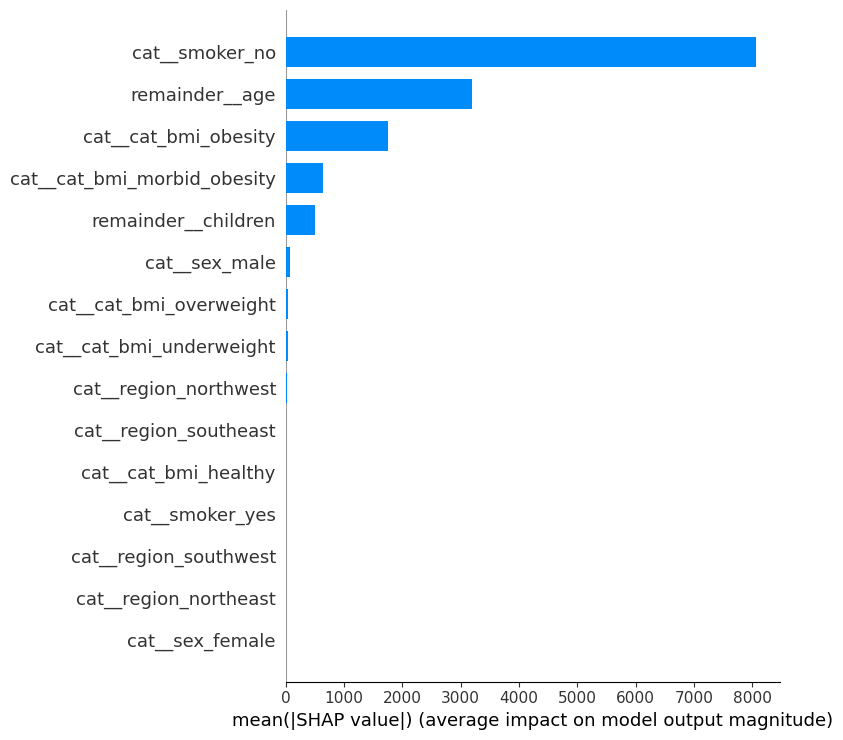

In [64]:
#plot the feature importance
# shap.summary_plot(shap_values,feature_names= newColowns, plot_type="bar")

In [ ]:
def generateShap():
    preprocessor.fit(X_train)
    newColowns =  preprocessor.get_feature_names_out()
    #set the tree explainer as the model of the pipeline
    explainer = shap.TreeExplainer(grid_search_fit.best_estimator_['decisiontree'])

    #apply the preprocessing to x_test
    observations = grid_search_fit.best_estimator_['preprocessor'].transform(X_test)
    #get Shap values from preprocessed data
    shap_values = explainer.shap_values(observations)
    shap = shap.summary_plot(shap_values,feature_names= newColowns, plot_type="bar")
    return shap
    